# Plotting and Visualization

*(Partial credit to: Luke Chang & Jin Cheong)*

In this notebook, we will introduce the basics of plotting in python using the `matplotlib` and `seaborn` packages. Matlotlib is probably the most popular python package for 2D graphics and has a nice tradeoff between ease of use and customizability. We will be working with the `pyplot` interface, which is an object-oriented plotting library based on plotting in Matlab. Many graphics libraries are built on top of matplotlib, and have tried to make plotting even easier. One library that is very nice to generate plots similar to how analyses are performed is [seaborn](https://seaborn.pydata.org/examples/index.html). There are many great tutorials online. Here are a few helpful resources from [neurohackademy](https://github.com/neurohackademy/visualization-in-python/blob/master/visualization-in-python.ipynb), [Jake Vanderplas](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb), and [rougier](https://github.com/rougier/matplotlib-tutorial).


## 1. Matplotlib - Key Concepts
There are a few different types of concepts in the `matplotlib.pyplot` framework.
- `Figure`: Essentially the canvas, which contains the plots
- `Axes`: An individual plot within a figure. Each Axes has a title, an x-label, and a y-label
- `Axis`: These contain the graph limits and tickmarks
- `Artist`: Everything that is visiable on the figure is an artist (e.g., Text objects, Line2D object, collection objects). Artists are typically tied to a specific Axes.

**BE ADVISED**: Axes should not be confused with axis. An Axes is the area of the plot containing the lines/points/markers of data. Axis are the coordinate axis of the plot. See the figure for reference. Please check the image below:

<img src="https://matplotlib.org/1.5.1/_images/fig_map.png" style="width:33%">
  <figcaption>Image credit: <a href="https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure">Matplotlib 1.5.1 FAQ</a></figcaption>

*Axes* are what are traditionally thought of as the *area* of the plot.  These can contain the actual coordinate axis and tick marks, the lines or line markers for the data being plotting, legend, title, axis labels, etc.  The *Figure* can contain more than one `Axes`.  These `Axes` could appear side-by-side or in a grid, or they can appear essentially on top of one another where they share an $x$ or $y$ axis.  The `Figure` can also contain a color bar in a contour or surface plot and a title.

The following figure taken from the [Matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html) is useful reference identifying the different parts of a two-dimensional plot.

<figure>
  <img src="https://matplotlib.org/_images/anatomy1.png" style="width:50%">
  <figcaption>Image credit: <a href="https://matplotlib.org/faq/usage_faq.html">Matplotlib FAQ</a></figcaption>
</figure>


**Note**: `%matplotlib inline` is an example of 'cell magic' and enables plotting *within* the notebook and not opening a separate window. In addition, you may want to try using `%matplotlib notebook`, which will allow more interactive plotting.

Let's get started by loading the modules needed

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Lineplot

First, let's generate some numbers and create a basic lineplot.

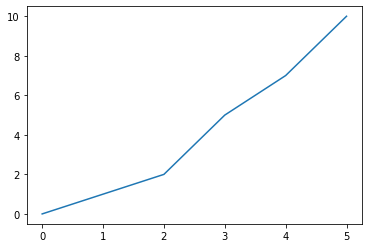

In [15]:
some_numbers = [0, 1, 2, 5, 7, 10]
plt.plot(some_numbers)

### 1.1.1. Using NumPy data

In this example, with Numpy we plot:

$y = x^3$ 

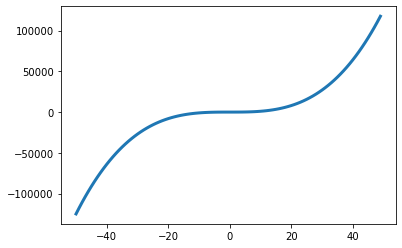

In [26]:
x = np.arange(-50, 50, 1) # Generate data from 0 to 50 on 1-step basis

y = x ** 3  # To the power of 3

plt.plot(x, y, linewidth=3)

### 1.1.2. Changing the plot style 

There are many options for changing the plot style.  You have ultimate control over the entire look and feel.  In the example below, we only add grid lines; however, you can adjust major and minor tic marks on the axis, change fonts, remove an axis or the entire frame, add a title, etc.  With the [`Artist`](https://matplotlib.org/tutorials/intermediate/artists.html) class, you can add annotations and adjust colors, basically you have full control over anything that can be rendered on the canvas.

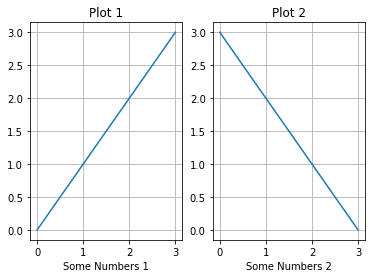

In [42]:
#plt.xlabel("Some Numbers 1");
#plt.plot([1,2,3,4])
#plt.grid()

# Or use the FIGURE + AXES form

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.plot([0, 1, 2, 3])
ax1.set_xlabel("Some Numbers 1");
ax1.set_title("Plot 1")
ax1.grid()

ax2.plot([3, 2, 1, 0])
ax2.set_title("Plot 2")
ax2.set_xlabel("Some Numbers 2");
ax2.grid()

Matplotlib has several built in "styles" that add some default design styling to background colors, fonts, and line colors, etc.

This example uses the style `'fivethirtyeight'` which is based on a style made popular by Nate Silver's [FiveThirtyEight](https://fivethirtyeight.com/) website.

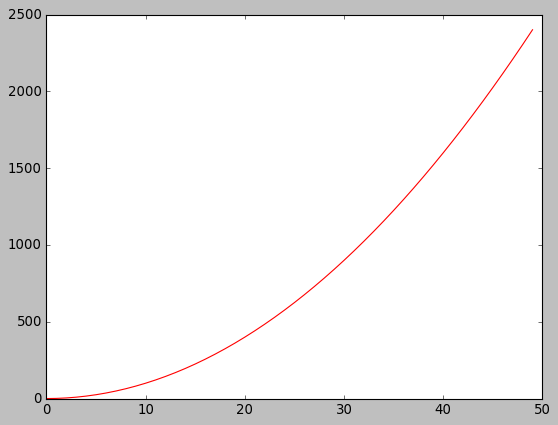

In [43]:
plt.style.use('classic')

x = np.arange(0, 50, 1)
y = x ** 2

plt.plot(x, y, linewidth=1, color='red')

Every style available in the Python/Matplotlib environment you are working in is available with the `matplotlib.pyplot.style.available` command.

In [44]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

It is important to run this if we want to set the default style.

In [45]:
# Reset matplotlib styles in this Notebook
plt.style.use('default')
%matplotlib inline

### 1.3 Scatterplot

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker the position depends on its values in the columns set on the X and Y axes. A third variable can be set to correspond to the color or size of the markers, thus adding yet another dimension to the plot.

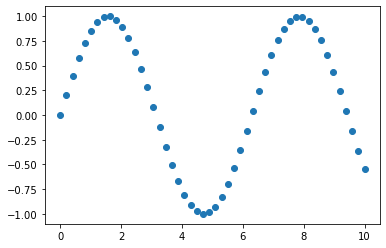

In [60]:
x = np.linspace(0, 10, 50)
y = np.sin(x)
plt.scatter(x, y)

### 1.4 Histogram
A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. It is a kind of bar graph.

To construct a histogram, follow these steps:

* Bin the range of values.
* Divide the entire range of values into a series of intervals.
* Count how many values fall into each interval.

The bins are usually specified as consecutive, non-overlapping intervals of a variable.

The matplotlib.pyplot.hist() function plots a histogram. It computes and draws the histogram of x.

(array([1.0000e+00, 2.0000e+00, 3.0000e+01, 1.3900e+02, 4.6000e+02,
        1.3490e+03, 3.4240e+03, 6.7900e+03, 1.1291e+04, 1.5715e+04,
        1.7360e+04, 1.6191e+04, 1.2491e+04, 7.9980e+03, 4.2000e+03,
        1.7060e+03, 6.0500e+02, 1.9500e+02, 4.0000e+01, 1.3000e+01]),
 array([-0.05842302,  0.41729445,  0.89301193,  1.3687294 ,  1.84444688,
         2.32016436,  2.79588183,  3.27159931,  3.74731678,  4.22303426,
         4.69875174,  5.17446921,  5.65018669,  6.12590417,  6.60162164,
         7.07733912,  7.55305659,  8.02877407,  8.50449155,  8.98020902,
         9.4559265 ]),
 <BarContainer object of 20 artists>)

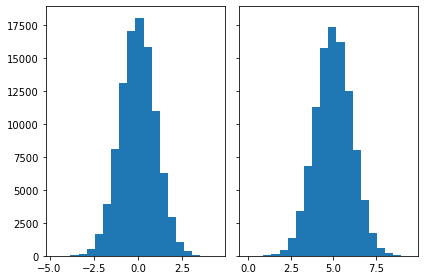

In [61]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

### 1.5 Bar Plot
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

Matplotlib API provides the bar() function that can be used in the MATLAB style use as well as object oriented API. The signature of bar() function to be used with axes object is as follows −

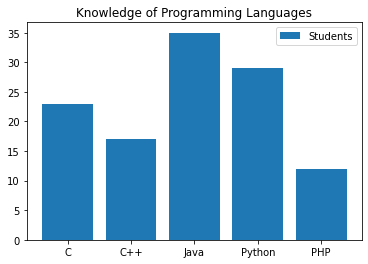

In [62]:
programming_languages = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]

dict_lang = {'C': 23, 'C++': 17, 'Java': 50, 'Python': 29, 'PHP': 12}

plt.title('Knowledge of Programming Languages')

#plt.bar(dict_lang.keys(), dict_lang.values())

plt.bar(programming_languages,students)
plt.legend(["Students"])

### 1.6 3D Plots
We can also plot in 3 dimensions with `mplot3d`. Surface plot shows a functional relationship between a designated dependent variable (Y), and two independent variables (X and Z). The plot is a companion plot to the contour plot. A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. This can aid perception of the topology of the surface being visualized. The plot_surface() function x,y and z as arguments.

Text(0.5, 0.92, 'Surface plot')

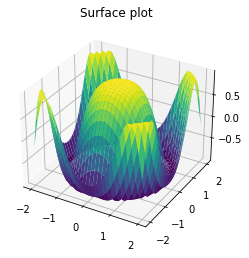

In [63]:
from mpl_toolkits import mplot3d
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)

ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')

### 1.7 Saving Plots
Plots can be saved to disk using the `savefig` command. There are lots of ways to customize the saved plot. I typically save rasterized versions as `.png` and vectorized versions as `.pdf`. Don't forget to specify a path where you want the file written to.

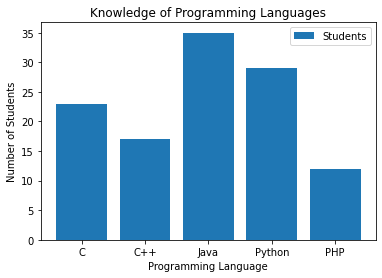

In [65]:
programming_languages = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
plt.title('Knowledge of Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Number of Students')
plt.bar(programming_languages,students)
plt.legend(["Students"])

#plt.savefig('my_first_python_plot.jpg', dpi=90)
plt.savefig('my_first_vectorized_python_plot.pdf')

## 2. Seaborn
Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

Most seaborn plots can be customized using the standard matplotlib commands, though be sure to look at the docstrings first as often there are already keywords within each type of plot to do what you want.

### 2.1. Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now we create some random walk data:

In [67]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

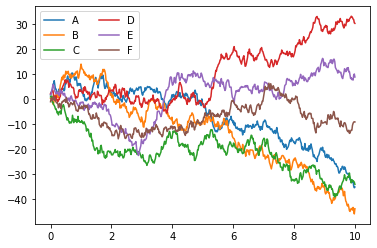

In [68]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [69]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

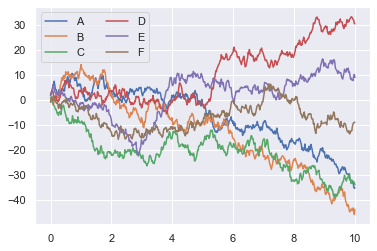

In [70]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### 2.2. Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### 2.3 Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

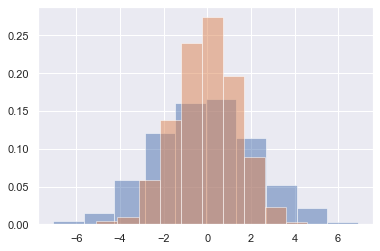

In [71]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

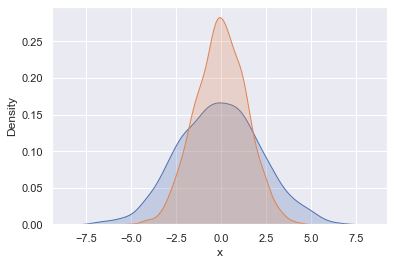

In [72]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``histplot`` (former ``distplot``):

<AxesSubplot:ylabel='Density'>

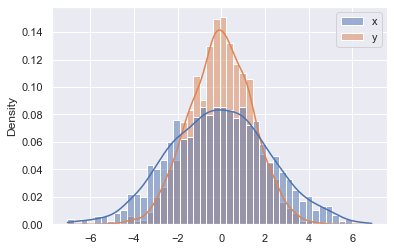

In [73]:
#sns.distplot(data['x']) # DEPRECATED
#sns.distplot(data['y']) # DEPRECATED
sns.histplot(data, color="red", kde=True, stat="density", linewidth=1)

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

<AxesSubplot:xlabel='x', ylabel='Density'>

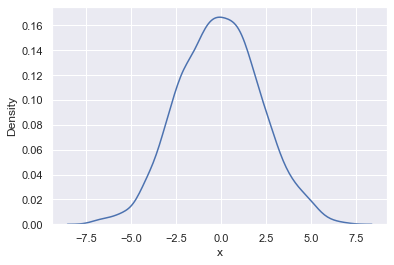

In [74]:
sns.kdeplot(data['x'])

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

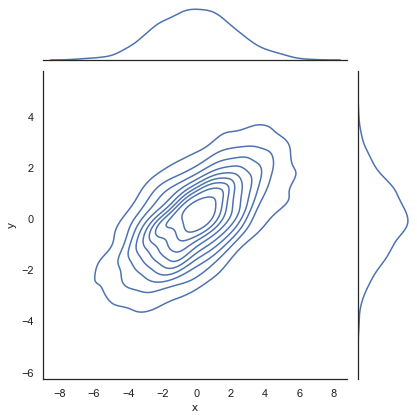

In [75]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

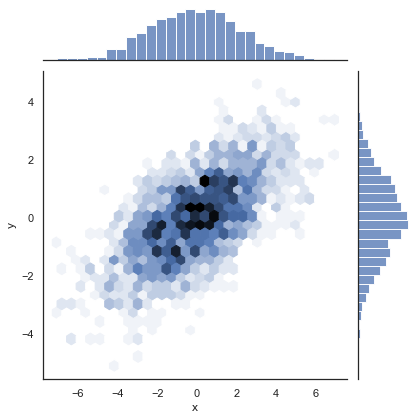

In [76]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

### 2.4. Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [85]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

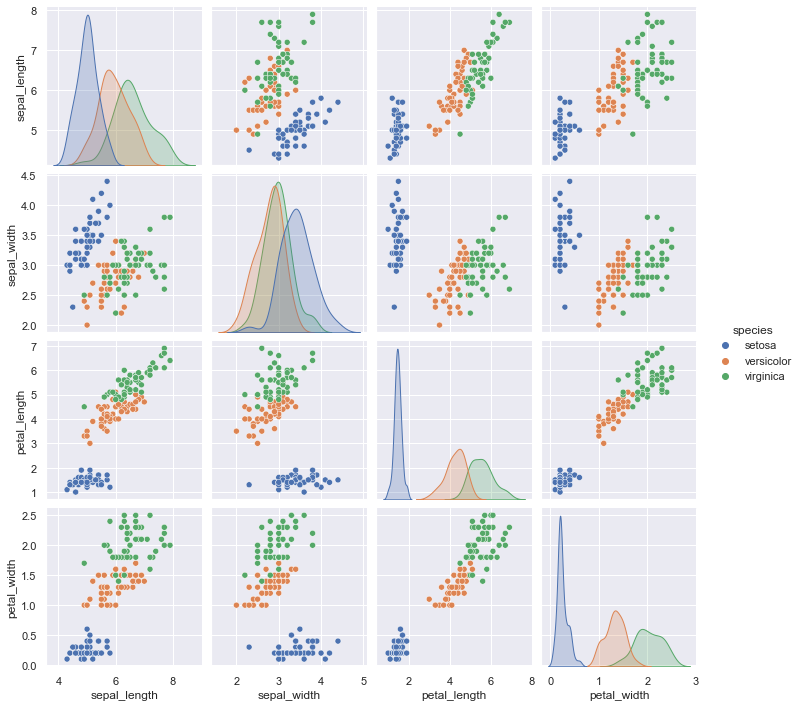

In [87]:
sns.pairplot(iris, hue='species', height=2.5);

<AxesSubplot:>

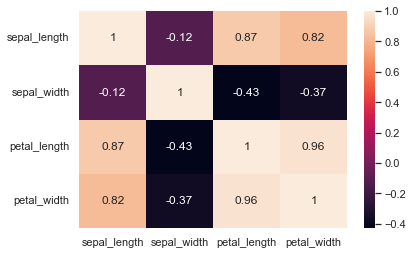

In [79]:
sns.heatmap(data=iris.corr(), annot=True)

### 2.5 Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [80]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


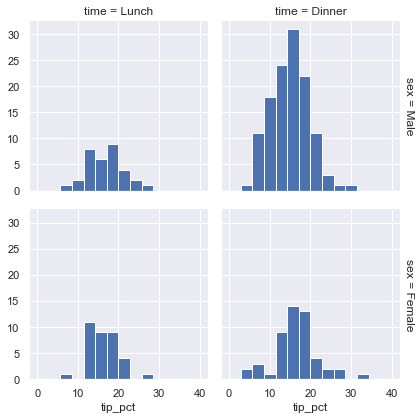

In [81]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### 2.6 Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

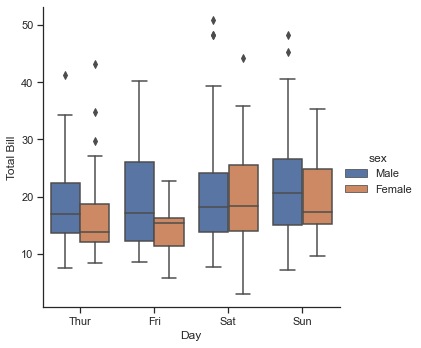

In [82]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### 2.6 Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

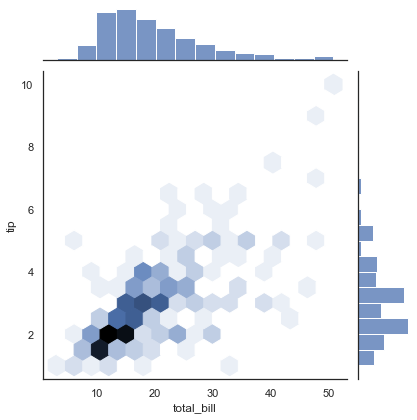

In [83]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

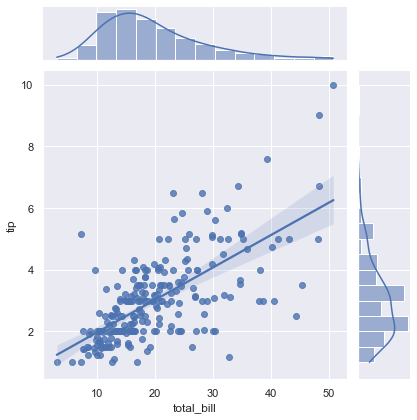

In [84]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### 2.7 Bar plots

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data.

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded
(if you are interested in using Python for web scraping, I would recommend [*Web Scraping with Python*](http://shop.oreilly.com/product/0636920034391.do) by Ryan Mitchell).
We will start by downloading the data from
the Web, and loading it into Pandas:

In [ ]:
#!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [ ]:
df_marathon = pd.read_csv('marathon-data.csv')
df_marathon.head()

By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [ ]:
df_marathon.dtypes

Let's fix this by providing a converter for the times:

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

df_marathon = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
df_marathon.head()

In [ ]:
df_marathon.dtypes

That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

In [ ]:
df_marathon['split_sec'] = df_marathon['split'] / np.timedelta64(1, 's')
df_marathon['final_sec'] = df_marathon['final'] / np.timedelta64(1, 's')
data.head()

To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=df_marathon, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [ ]:
df_marathon['split_frac'] = 1 - 2 * df_marathon['split_sec'] / df_marathon['final_sec']
df_marathon.head()

Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

In [ ]:
sns.histplot(df_marathon['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(df_marathon.split_frac < 0)

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

In [ ]:
g = sns.PairGrid(df_marathon, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot.

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

In [ ]:
sns.kdeplot(df_marathon.split_frac[df_marathon.gender=='M'], label='men', shade=True)
sns.kdeplot(df_marathon.split_frac[df_marathon.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*

In [ ]:
sns.violinplot(x="gender", y="split_frac", data=df_marathon,
               palette=["lightblue", "lightpink"]);

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [ ]:
df_marathon['age_dec'] = df_marathon.age.map(lambda age: 10 * (age // 10))
df_marathon.head()

In [ ]:
men = (df_marathon.gender == 'M')
women = (df_marathon.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=df_marathon,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [ ]:
(df_marathon.age > 80).sum()

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

In [ ]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=df_marathon,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

## 3. Interactive Plots
Interactive data visualizations are an exciting development and are likely to continue to grow in popularity with the rapid developments in web frontend frameworks. Covering these libraries is beyond the scope of this tutorial, but I highly encourage you to check them out. Some of them are surprisingly easy to use and make exploring your data and sharing your results much more fun.

It is possible to add some basic interactivity to the plotting libraries covered in this tutorial in jupyter notebooks with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/). You will see a few examples of this in other tutorials.

### Plotly
[Plotly](https://plotly.com/python/) is an graphing library to make interactive plots.

### Bokeh
[Bokeh](https://docs.bokeh.org/en/latest/index.html) is an interactive visualization library
    
### Altair
[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python based on Vega
